In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline


In [7]:
df = pd.read_csv("../data/logs/daily_log.csv")
df.head()


,Date,Food,Protein (g),Carbs (g),Fat (g),Calories (kcal)
0,2025-06-19,I ate a full plate biryani today,11.0,75.0,17.5,500.0
1,2025-06-19,I ate 4 pieces of chicken tandoor today,NaN,NaN,NaN,NaN
2,2025-06-19,I ate 1 serving of pani puri,2.5,17.5,5.5,135.0
3,2025-06-19,I ate chicken burger,37.5,12.5,32.5,275.0


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date")
df.head()


,Date,Food,Protein (g),Carbs (g),Fat (g),Calories (kcal)
0,2025-06-19,I ate a full plate biryani today,11.0,75.0,17.5,500.0
1,2025-06-19,I ate 4 pieces of chicken tandoor today,NaN,NaN,NaN,NaN
2,2025-06-19,I ate 1 serving of pani puri,2.5,17.5,5.5,135.0
3,2025-06-19,I ate chicken burger,37.5,12.5,32.5,275.0


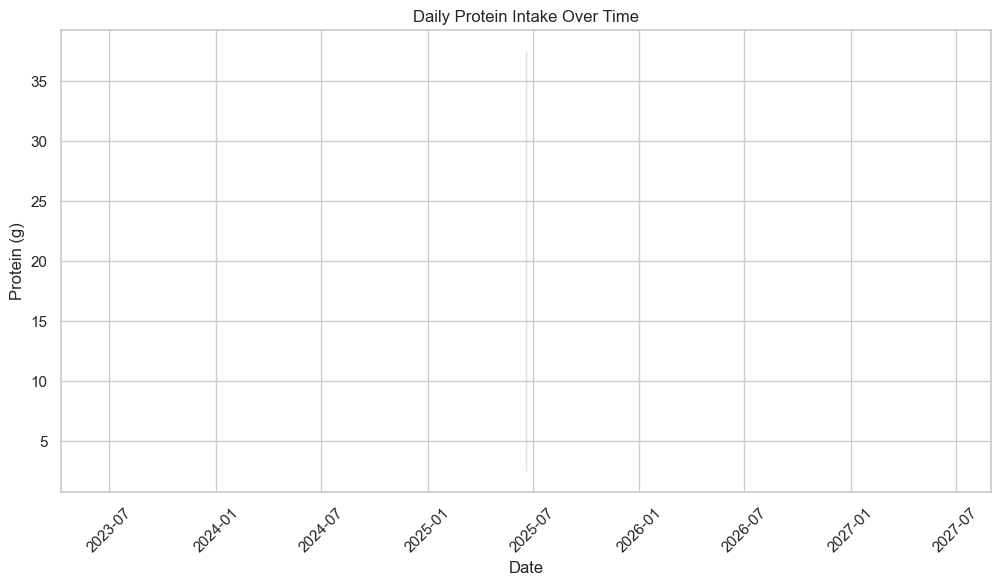

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Protein (g)", markers='o')
plt.title("Daily Protein Intake Over Time")
plt.ylabel("Protein (g)")
plt.xticks(rotation=45)
plt.show()


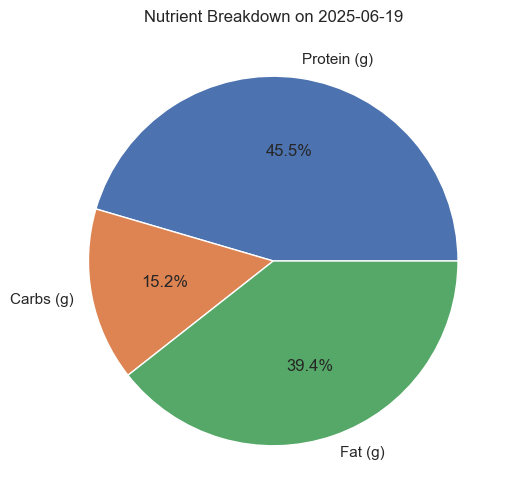

In [10]:
latest = df.iloc[-1]

nutrients = {
    "Protein (g)": latest["Protein (g)"],
    "Carbs (g)": latest["Carbs (g)"],
    "Fat (g)": latest["Fat (g)"]
}

plt.figure(figsize=(6,6))
plt.pie(nutrients.values(), labels=nutrients.keys(), autopct='%1.1f%%')
plt.title(f"Nutrient Breakdown on {latest['Date'].date()}")
plt.show()


In [11]:
df_sum = df[["Protein (g)", "Carbs (g)", "Fat (g)", "Calories (kcal)"]].sum()
df_sum


Protein (g)         51.0
Carbs (g)          105.0
Fat (g)             55.5
Calories (kcal)    910.0
dtype: float64